In [30]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, matplotlib as mpl, time, seaborn as sns, warnings, sklearn.metrics as metrics

mpl.rcParams['patch.force_edgecolor'] = True
warnings.filterwarnings("ignore")
%matplotlib inline

In [12]:
#importing the traing dataset

td = pd.read_csv('training.csv')
bots = td[td.bot == 1]
real = td[td.bot == 0]

## Exploratory Data Analysis

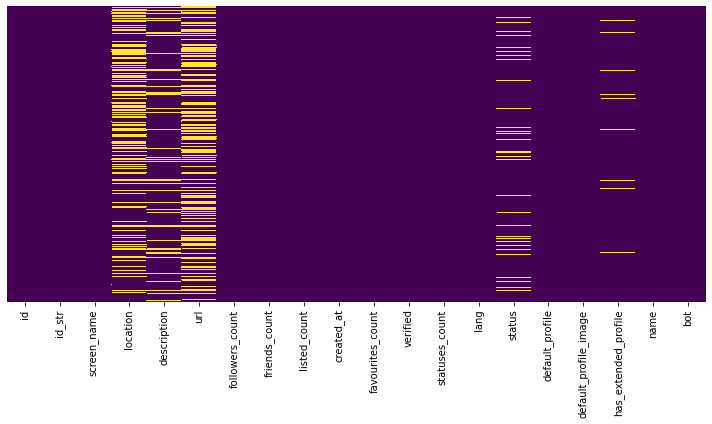

In [7]:
#Getting all NaN values

def get_htmp(df):
    plt.figure(figsize = (10,6))
    sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
    plt.tight_layout()
    return plt.show()
get_htmp(td)

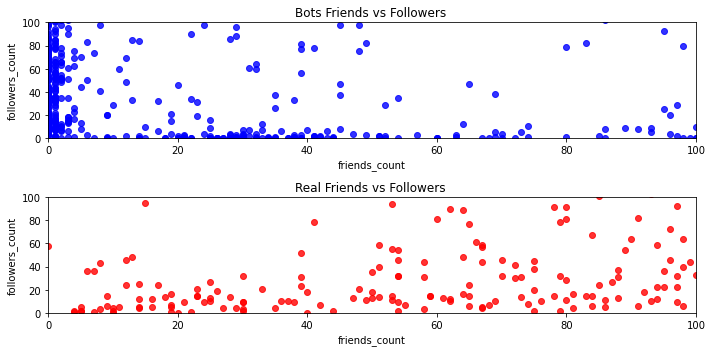

In [11]:
#bots.friends_count #/ bots.followers_count
plt.figure(figsize = (10,5))
plt.subplot(2,1,1)
plt.title('Bots Friends vs Followers ')
sns.regplot(bots.friends_count, bots.followers_count, color ='blue', label ='Bots')
plt.xlim(0,100)
plt.ylim(0,100)
plt.tight_layout()

plt.subplot(2,1,2)
plt.title("Real Friends vs Followers ")
sns.regplot(nonbots.friends_count, nonbots.followers_count, color ='red', label = 'Real')
plt.xlim(0,100)
plt.ylim(0,100)

plt.tight_layout()
plt.show()

## Imbalance in the Data

(504, 21)


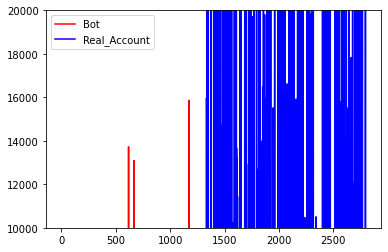

In [13]:
bots['friends_by_followers'] = bots.friends_count / bots.followers_count
plt.plot(bots.listed_count, color = 'red', label ='Bot')
plt.plot(real.listed_count, color ='blue', label ='Real_Account')
plt.legend(loc = 'upper left')
plt.ylim(10000,20000)
print(bots[bots.listed_count < 5] . shape)

In [14]:
bots_listed_count_df = bots[bots.listed_count < 16000]
real_listed_count_df = nonbots[nonbots.listed_count < 16000]

bots_verified_df = bots_listed_count_df[bots_listed_count_df.verified == False]
bots_screenname_has_bot_df = bots_verified_df[bots_verified_df.screen_name.str.contains('bot', case = False) == True].shape


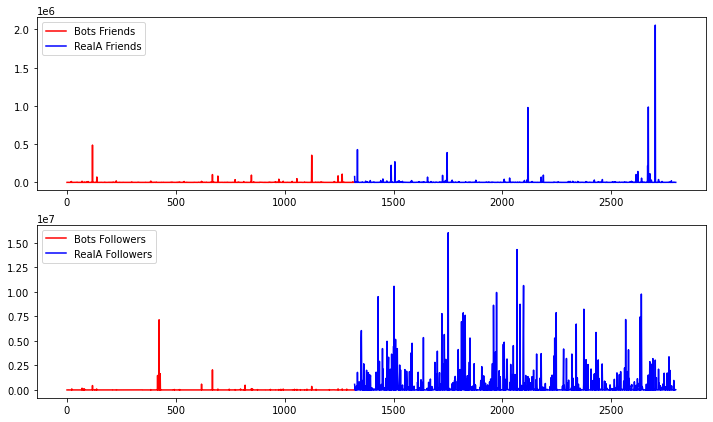

In [17]:
plt.figure(figsize =(12,7))
plt.subplot(2,1,1)
plt.plot(bots_listed_count_df.friends_count, color ='red', label = 'Bots Friends')
plt.plot(real_listed_count_df.friends_count, color ='blue', label = 'RealA Friends')
plt.legend(loc ='upper left')

plt.subplot(2,1,2)
plt.plot(bots_listed_count_df.followers_count, color ='red', label ='Bots Followers')
plt.plot(real_listed_count_df.followers_count, color ='blue', label ='RealA Followers')
plt.legend(loc = 'upper left')

In [18]:
#bots[bots.listedcount>10000]
condition = (bots.screen_name.str.contains("bot", case=False)==True)|(bots.description.str.contains("bot", case=False)==True)|(bots.location.isnull())|(bots.verified==False)

bots['screen_name_binary'] = (bots.screen_name.str.contains("bot", case=False)==True)
bots['location_binary'] = (bots.location.isnull())
bots['verified_binary'] = (bots.verified==False)
bots.shape

(1321, 24)

In [19]:
condition = (real.screen_name.str.contains("bot", case=False)==False)| (nonbots.description.str.contains("bot", case=False)==False) |(nonbots.location.isnull()==False)|(nonbots.verified==True)

nonbots['screen_name_binary'] = (real.screen_name.str.contains("bot", case=False)==False)
nonbots['location_binary'] = (real.location.isnull()==False)
nonbots['verified_binary'] = (real.verified==True)

nonbots.shape

(1476, 23)

In [20]:
df = pd.concat([bots, nonbots])
df.shape

(2797, 24)

## FI using Spearman Correlation

In [21]:
df.corr(method='spearman')

,id,followers_count,friends_count,listed_count,favourites_count,verified,statuses_count,default_profile,default_profile_image,bot,friends_by_followers,screen_name_binary,location_binary,verified_binary
id,1.000000,-0.672925,-0.402346,-0.615005,-0.439430,-0.611899,-0.451945,0.522990,0.166601,0.652131,0.298397,-0.576100,-0.228328,0.150100
followers_count,-0.672925,1.000000,0.375522,0.896126,0.457363,0.709732,0.649117,-0.496899,-0.293838,-0.468430,-0.448979,0.458213,0.189675,0.130717
friends_count,-0.402346,0.375522,1.000000,0.204403,0.641529,0.356452,0.111118,-0.296358,-0.097607,-0.483105,0.875497,0.342145,0.082692,-0.210592
listed_count,-0.615005,0.896126,0.204403,1.000000,0.349059,0.694340,0.684976,-0.447376,-0.269035,-0.318445,-0.599098,0.338698,0.188797,0.281360
favourites_count,-0.439430,0.457363,0.641529,0.349059,1.000000,0.394227,0.295108,-0.348043,-0.226956,-0.526228,0.442935,0.408864,0.120941,-0.220894
verified,-0.611899,0.709732,0.356452,0.694340,0.394227,1.000000,0.333278,-0.404650,-0.132298,-0.508555,-0.002906,0.434177,0.191922,0.346505
statuses_count,-0.451945,0.649117,0.111118,0.684976,0.295108,0.333278,1.000000,-0.375918,-0.289999,-0.089018,-0.520891,0.162213,0.105333,0.207384
default_profile,0.522990,-0.496899,-0.296358,-0.447376,-0.348043,-0.404650,-0.375918,1.000000,0.246979,0.407748,0.116299,-0.377572,-0.138378,0.072351
default_profile_image,0.166601,-0.293838,-0.097607,-0.269035,-0.226956,-0.132298,-0.289999,0.246979,1.000000,0.139669,0.190555,-0.166388,0.000596,0.033021
bot,0.652131,-0.468430,-0.483105,-0.318445,-0.526228,-0.508555,-0.089018,0.407748,0.139669,1.000000,NaN,-0.843429,-0.266342,0.606771


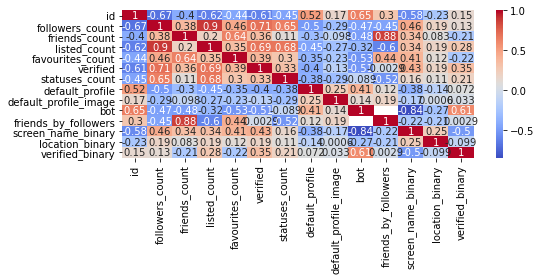

In [22]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

## Performing Feature Engineering

In [24]:
#filepath = 'Whrere the file dataset have been stored'
file= open('training.csv', mode='r', encoding='utf-8', errors='ignore')

training_data = pd.read_csv(file)

bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
            
training_data['screen_name_binary'] = training_data.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['name_binary'] = training_data.name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['description_binary'] = training_data.description.str.contains(bag_of_words_bot, case=False, na=False)
training_data['status_binary'] = training_data.status.str.contains(bag_of_words_bot, case=False, na=False)

## Performing Feature Extraction

In [25]:
training_data['listed_count_binary'] = (training_data.listed_count>20000)==False
features = ['screen_name_binary', 'name_binary', 'description_binary', 'status_binary', 'verified', 'followers_count', 'friends_count', 'statuses_count', 'listed_count_binary', 'bot']

## Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

dt = dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Trainig Accuracy: 0.88707
Test Accuracy: 0.87857


## Random Forest Classifier


In [28]:
from sklearn.ensemble import RandomForestClassifier

X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

rf = rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Trainig Accuracy: 0.88196
Test Accuracy: 0.86190


## Manual Code

In [35]:
class tbd(object):
    def __init__(self):
        pass

    def perform_train_test_split(df):
        msk = np.random.rand(len(df)) < 0.75
        train, test = df[msk], df[~msk]
        X_train, y_train = train, train.iloc[:,-1]
        X_test, y_test = test, test.iloc[:, -1]
        return (X_train, y_train, X_test, y_test)

    def bot_prediction_algorithm(df):
        # creating copy of dataframe
        train_df = df.copy()
        # performing feature engineering on id and verfied columns
        # converting id to int
        train_df['id'] = train_df.id.apply(lambda x: int(x))
        #train_df['friends_count'] = train_df.friends_count.apply(lambda x: int(x))
        train_df['followers_count'] = train_df.followers_count.apply(lambda x: 0 if x=='None' else int(x))
        train_df['friends_count'] = train_df.friends_count.apply(lambda x: 0 if x=='None' else int(x))
        #We created two bag of words because more bow is stringent on test data, so on all small dataset we check less
        if train_df.shape[0]>600:
            #bag_of_words_for_bot
            bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                           r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                           r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                           r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
        else:
            # bag_of_words_for_bot
            bag_of_words_bot = r'bot|b0t|cannabis|mishear|updates every'

        # converting verified into vectors
        train_df['verified'] = train_df.verified.apply(lambda x: 1 if ((x == True) or x == 'TRUE') else 0)

        # check if the name contains bot or screenname contains b0t
        condition = ((train_df.name.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.description.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.screen_name.str.contains(bag_of_words_bot, case=False, na=False)) |
                     (train_df.status.str.contains(bag_of_words_bot, case=False, na=False))
                     )  # these all are bots
        predicted_df = train_df[condition]  # these all are bots
        predicted_df.bot = 1
        predicted_df = predicted_df[['id', 'bot']]

        # check if the user is verified
        verified_df = train_df[~condition]
        condition = (verified_df.verified == 1)  # these all are nonbots
        predicted_df1 = verified_df[condition][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])

        # check if description contains buzzfeed
        buzzfeed_df = verified_df[~condition]
        condition = (buzzfeed_df.description.str.contains("buzzfeed", case=False, na=False))  # these all are nonbots
        predicted_df1 = buzzfeed_df[buzzfeed_df.description.str.contains("buzzfeed", case=False, na=False)][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])

        # check if listed_count>16000
        listed_count_df = buzzfeed_df[~condition]
        listed_count_df.listed_count = listed_count_df.listed_count.apply(lambda x: 0 if x == 'None' else x)
        listed_count_df.listed_count = listed_count_df.listed_count.apply(lambda x: int(x))
        condition = (listed_count_df.listed_count > 16000)  # these all are nonbots
        predicted_df1 = listed_count_df[condition][['id', 'bot']]
        predicted_df1.bot = 0
        predicted_df = pd.concat([predicted_df, predicted_df1])

        #remaining
        predicted_df1 = listed_count_df[~condition][['id', 'bot']]
        predicted_df1.bot = 0 # these all are nonbots
        predicted_df = pd.concat([predicted_df, predicted_df1])
        return predicted_df

    def get_predicted_and_true_values(features, target):
        y_pred, y_true = twitter_bot.bot_prediction_algorithm(features).bot.tolist(), target.tolist()
        return (y_pred, y_true)

    def get_accuracy(df):
        (X_train, y_train, X_test, y_test) = twitter_bot.perform_train_test_split(df)
        # predictions on training data
        y_pred_train, y_true_train = twitter_bot.get_predicted_and_true_values(X_train, y_train)
        train_acc = metrics.accuracy_score(y_pred_train, y_true_train)
        #predictions on test data
        y_pred_test, y_true_test = twitter_bot.get_predicted_and_true_values(X_test, y_test)
        test_acc = metrics.accuracy_score(y_pred_test, y_true_test)
        return (train_acc, test_acc)
if __name__ == '__main__':
    start = time.time()
    train_df = pd.read_csv('training.csv')
    test_df = pd.read_csv('testing.csv', encoding ='latin1',sep='\t')
    print("Train Accuracy: ", tbd.get_accuracy(train_df)[0])
    print("Test Accuracy: ", tbd.get_accuracy(train_df)[1])
    #predicting test data results
    predicted_df = twitter_bot.bot_prediction_algorithm(test_df)
    print(predicted_df)

Train Accuracy:  0.9583945178658835
Test Accuracy:  0.9736111111111111
                     id  bot
4            1324548560    1
5            2561341789    1
6             347810134    1
7             856303860    1
8    832875000000000000    1
..                  ...  ...
496  807000000000000000    0
539  728000000000000000    0
543           360945774    0
553           332888068    0
561            16712547    0

[575 rows x 2 columns]
